## 2. Data Analyst - Run SQL on tables and plot data

In [1]:
from google.cloud import bigquery

client = bigquery.Client()

In [18]:
%%bigquery
SELECT 
    isFraud,
    COUNT(*) as count
FROM `datalake-vol2.datalake_vol2_raw.transaction_data_train`
GROUP BY isFraud

Downloading: 100%|██████████| 2/2 [00:00<00:00,  2.33rows/s]


,isFraud,count
0,0,5084177
1,1,6515


In [19]:
%%bigquery
SELECT 
    type,
    COUNT(*) as Transactions,
    AVG(amount) as Average_amount
FROM `datalake-vol2.datalake_vol2_raw.transaction_data_train`
GROUP BY type

Downloading: 100%|██████████| 5/5 [00:00<00:00,  5.71rows/s]


,type,Transactions,Average_amount
0,DEBIT,33232,5429.525721
1,CASH_IN,1119488,168971.357671
2,PAYMENT,1720819,13060.837903
3,CASH_OUT,1790849,176275.914919
4,TRANSFER,426304,910769.986844


In [20]:
%%bigquery
SELECT 
    type, 
    SUM(amount) as total_amount
FROM `datalake-vol2.datalake_vol2_raw.transaction_data_train`
GROUP BY type

Downloading: 100%|██████████| 5/5 [00:00<00:00,  5.68rows/s]


,type,total_amount
0,DEBIT,1.804340e+08
1,CASH_IN,1.891614e+11
2,PAYMENT,2.247534e+10
3,CASH_OUT,3.156835e+11
4,TRANSFER,3.882649e+11


### Spark to Pandas DataFrame

Enable Apache Arrow to allow faster conversion from Spark DataFrame to Pandas DataFrame.

In [5]:
sql = """
SELECT 
    type,
    COUNT(*) as Transactions,
    AVG(amount) as Average_amount
FROM `datalake-vol2.datalake_vol2_raw.transaction_data_train`
GROUP BY type
"""

In [10]:
df_transaction_data_train = client.query(sql).to_dataframe()

In [11]:
type(df_transaction_data_train)

pandas.core.frame.DataFrame

In [12]:
df_transaction_data_train.head()

,type,Transactions,Average_amount
0,CASH_OUT,1790849,176275.914919
1,TRANSFER,426304,910769.986844
2,DEBIT,33232,5429.525721
3,CASH_IN,1119488,168971.357671
4,PAYMENT,1720819,13060.837903


### Plot data using Pandas Plotting

In [13]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='type'>

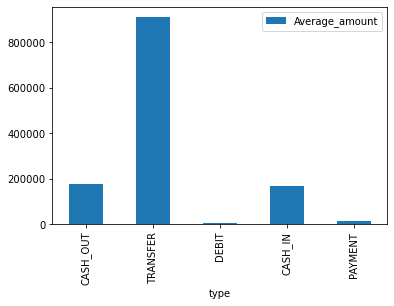

In [15]:
df_transaction_data_train.plot.bar(x='type', y='Average_amount', rot=90)

In [16]:
df_transaction_data_train.set_index('type', inplace=True)
df_transaction_data_train.head()

,Transactions,Average_amount
type,,
CASH_OUT,1790849,176275.914919
TRANSFER,426304,910769.986844
DEBIT,33232,5429.525721
CASH_IN,1119488,168971.357671
PAYMENT,1720819,13060.837903


array([<AxesSubplot:title={'center':'Transactions'}, xlabel='type'>,
       <AxesSubplot:title={'center':'Average_amount'}, xlabel='type'>],
      dtype=object)

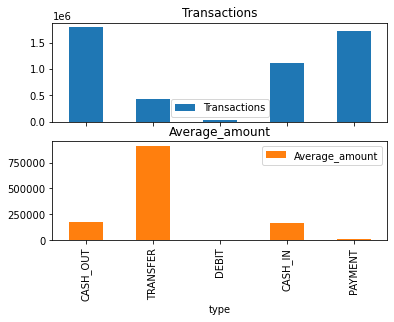

In [17]:
df_transaction_data_train.plot.bar(rot=90, subplots=True)